In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (enter data into your file)
df = pd.read_csv("global%20air%20pollution%20dataset.csv")

In [ ]:
#DATA CLEANING
#Remove duplicates
df.drop_duplicates(inplace=True)

# Delete rows with missing data
df.dropna(subset=['City', 'Country'], inplace=True)

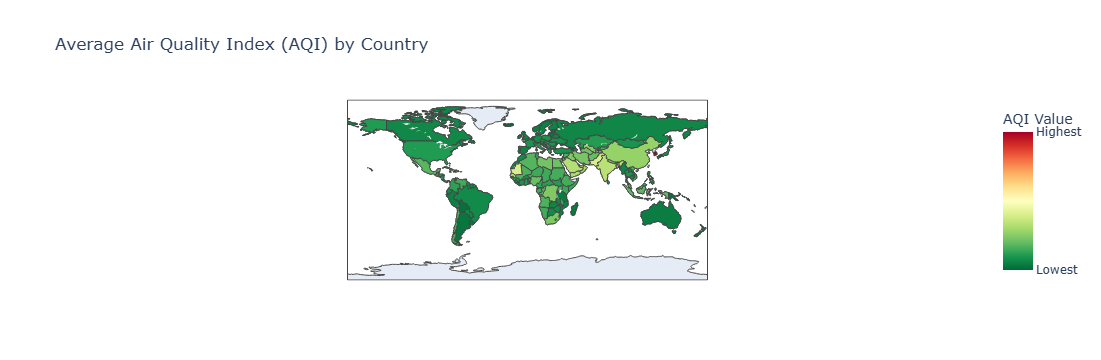

In [ ]:
#ANALYSIS
#Creating a map of air quality around the world
import plotly.express as px

# Calculating average AQI Value per each country
avg_aqi = df.groupby('Country')['AQI Value'].mean().reset_index()

# Creating a map
fig = px.choropleth(
    avg_aqi,
    locations='Country',      
    locationmode='country names',
    color='AQI Value',        
    color_continuous_scale='RdYlGn_r',  # green is good quality and  red is a bad one
    title="Average Air Quality Index (AQI) by Country"
)

# Legend and appearance
fig.update_layout(
    coloraxis_colorbar=dict(
        title="AQI Value",
        tickvals=[avg_aqi['AQI Value'].min(), avg_aqi['AQI Value'].max()],
        ticktext=["Lowest", "Highest"]
    )
)

fig.show()

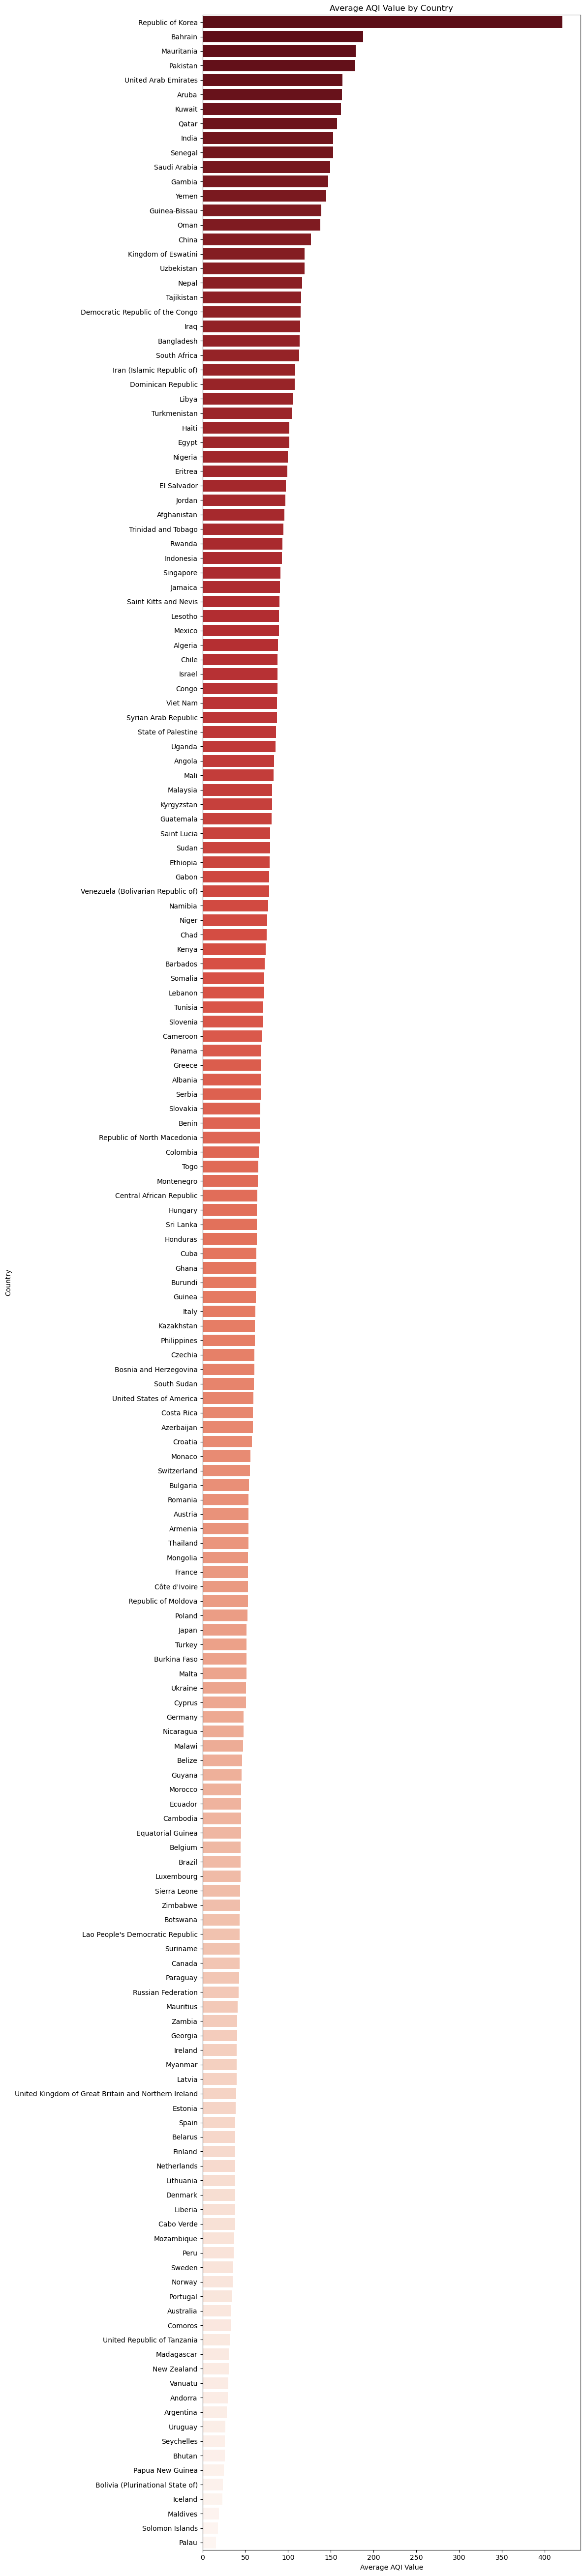

In [ ]:
# Grouping and calculating the average AQI for each country
avg_aqi = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False)

# Setting the chart size proportional to the number of countries
plt.figure(figsize=(12, len(avg_aqi) * 0.3))  

# bar plot
sns.barplot(
    x=avg_aqi.values,
    y=avg_aqi.index,
    hue=avg_aqi.index,
    palette='Reds_r',
    legend=False
)

# plot description
plt.title("Average AQI Value by Country")
plt.xlabel("Average AQI Value")
plt.ylabel("Country")

plt.tight_layout()
plt.show()

City_Country
Rajaldesar (India)      500.0
Kakrala (India)         500.0
Tajpur (India)          500.0
Jansath (India)         500.0
Maur (India)            500.0
Lodhran (Pakistan)      500.0
Kandhla (India)         500.0
Kanina (India)          500.0
Patiala (India)         500.0
Jalalabad (India)       500.0
Gopamau (India)         500.0
Harunabad (Pakistan)    500.0
Bhadasar (India)        500.0
Hasanpur (India)        500.0
Hastinapur (India)      500.0
Rania (India)           500.0
Bhadra (India)          500.0
Haldaur (India)         500.0
Kasganj (India)         500.0
Jahangirpur (India)     500.0
Name: AQI Value, dtype: float64


C:\Users\patry\AppData\Local\Temp\ipykernel_21228\2551163352.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




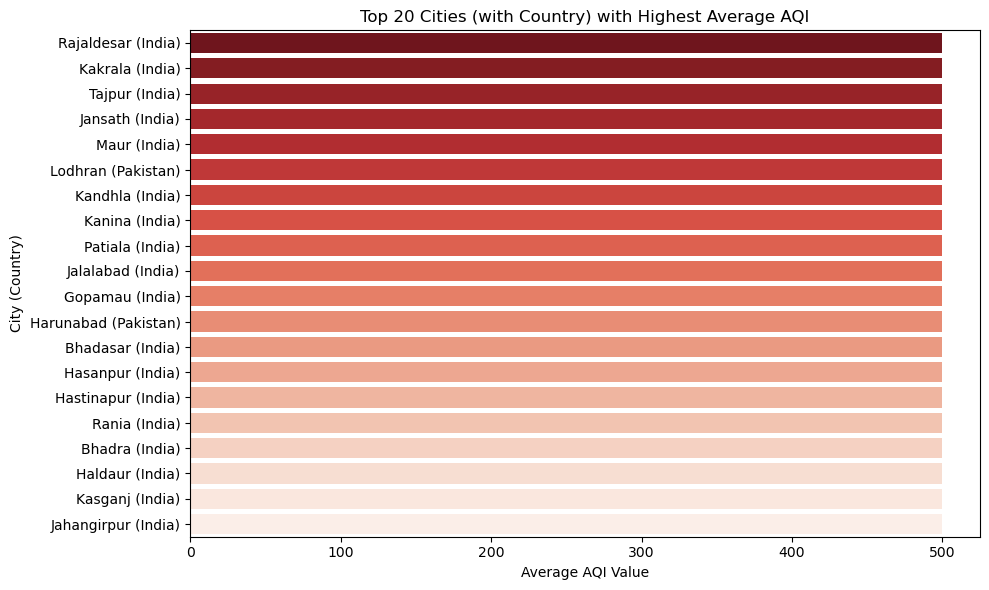

In [ ]:
#Top 20 Cities with Highest Average AQI
# create a column "City (Country)""
df["City_Country"] = df["City"] + " (" + df["Country"] + ")"

# Group by this new column
top_cities = (
    df.groupby("City_Country")["AQI Value"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

print(top_cities)

# plot
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_cities.values,
    y=top_cities.index,
    palette="Reds_r"
)
plt.title("Top 20 Cities (with Country) with Highest Average AQI")
plt.xlabel("Average AQI Value")
plt.ylabel("City (Country)")
plt.tight_layout()
plt.show()

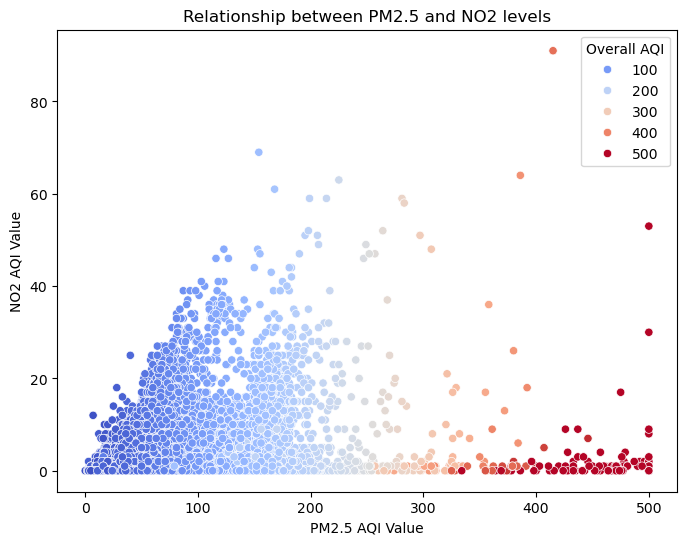

In [7]:
#Relationship between PM2.5 and NO2 levels
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='PM2.5 AQI Value',
    y='NO2 AQI Value',
    hue='AQI Value',
    palette='coolwarm'
)
plt.title("Relationship between PM2.5 and NO2 levels")
plt.xlabel("PM2.5 AQI Value")
plt.ylabel("NO2 AQI Value")
plt.legend(title="Overall AQI")
plt.show()

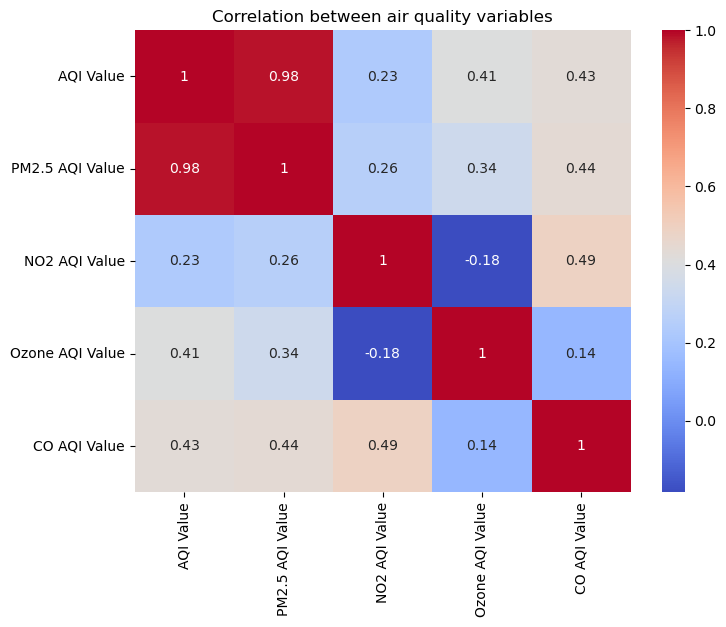

In [8]:
#Correlation between air quality variables
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['AQI Value', 'PM2.5 AQI Value', 'NO2 AQI Value', 'Ozone AQI Value', 'CO AQI Value']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation between air quality variables")
plt.show()